In [1]:
import os 
os.listdir()

['.ipynb_checkpoints', 'orders.csv', 'Untitled.ipynb']

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('orders.csv')

In [4]:
df.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,10-01-2023,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,18-06-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,13-07-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          9994 non-null   int64         
 1   order_date        9994 non-null   datetime64[ns]
 2   ship_mode         9994 non-null   object        
 3   segment           9994 non-null   object        
 4   country           9994 non-null   object        
 5   city              9994 non-null   object        
 6   state             9994 non-null   object        
 7   postal_code       9994 non-null   int64         
 8   region            9994 non-null   object        
 9   category          9994 non-null   object        
 10  sub_category      9994 non-null   object        
 11  product_id        9994 non-null   object        
 12  cost_price        9994 non-null   int64         
 13  list_price        9994 non-null   int64         
 14  quantity          9994 n

In [6]:
df.columns=[c.strip().lower().replace(' ','_') for c in df.columns]


In [7]:
df['order_date'].head

<bound method NDFrame.head of 0       01-03-2023
1       15-08-2023
2       10-01-2023
3       18-06-2022
4       13-07-2022
           ...    
9989    18-02-2023
9990    17-03-2023
9991    07-08-2022
9992    19-11-2022
9993    17-07-2022
Name: order_date, Length: 9994, dtype: object>

In [8]:
df['order_date']=pd.to_datetime(df['order_date'],format='%d-%m-%Y')

In [9]:
df.shape

(9994, 16)

In [10]:
df.describe()

,order_id,order_date,postal_code,cost_price,list_price,quantity,discount_percent
count,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-12-29 10:20:34.820892672,55190.379428,201.189714,229.756854,3.789574,3.484090
min,1.000000,2022-01-01 00:00:00,1040.000000,0.000000,0.000000,1.000000,2.000000
25%,2499.250000,2022-06-29 00:00:00,23223.000000,20.000000,20.000000,2.000000,2.000000
50%,4997.500000,2022-12-28 00:00:00,56430.500000,50.000000,50.000000,3.000000,3.000000
75%,7495.750000,2023-07-03 00:00:00,90008.000000,180.000000,210.000000,5.000000,4.000000
max,9994.000000,2023-12-31 00:00:00,99301.000000,18110.000000,22640.000000,14.000000,5.000000
std,2885.163629,NaN,32063.693350,537.743203,623.245839,2.225110,1.114211


In [39]:
df.isnull().sum()

order_id            0
order_date          0
ship_mode           0
segment             0
country             0
city                0
state               0
postal_code         0
region              0
category            0
sub_category        0
product_id          0
cost_price          0
list_price          0
quantity            0
discount_percent    0
dtype: int64

In [35]:
df['ship_mode']=df['ship_mode'].fillna(df['ship_mode'].mode()[0])

In [13]:
df.duplicated().sum()

0

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

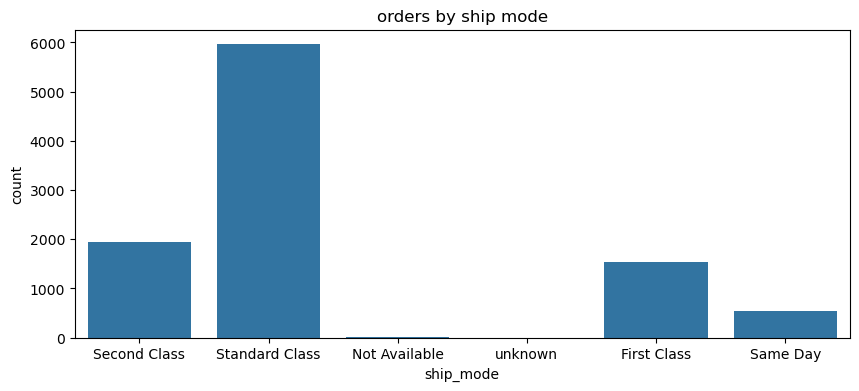

In [15]:
plt.figure(figsize=(10,4))
sns.countplot(x='ship_mode',data=df)
plt.title("orders by ship mode")
plt.show()

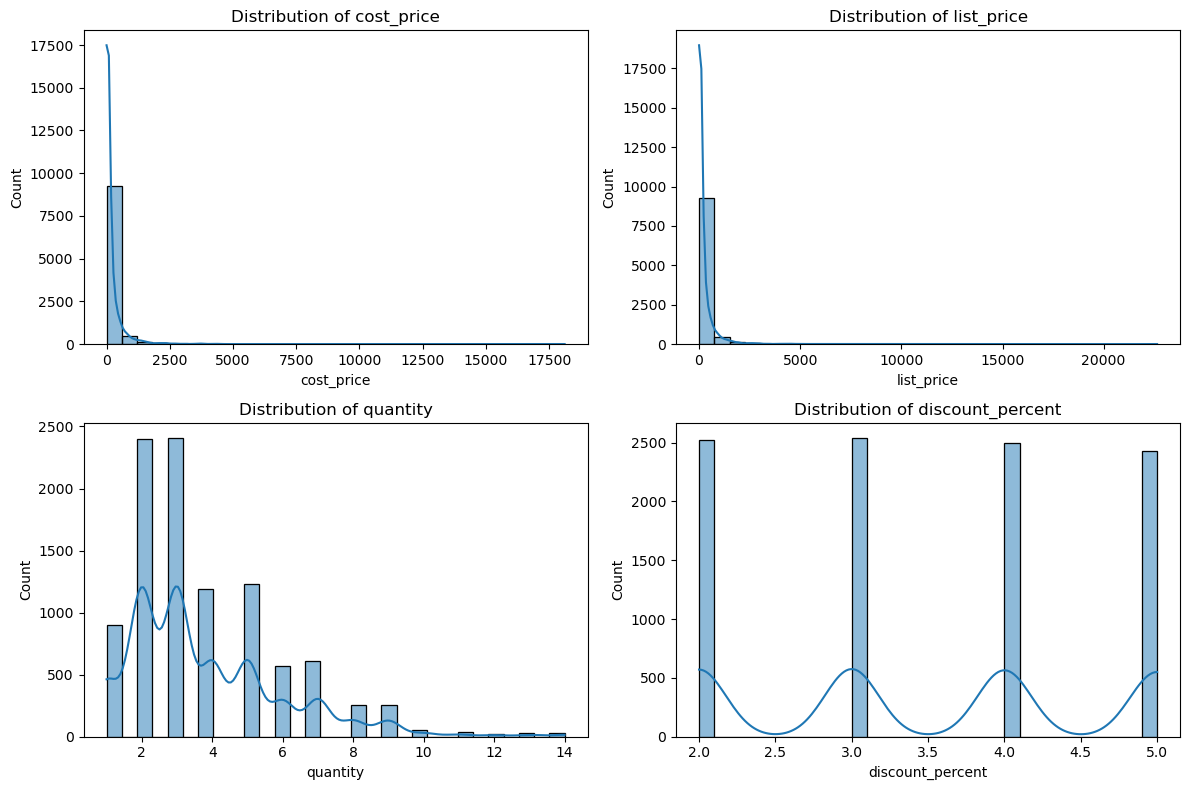

In [41]:
numeric_cols=['cost_price','list_price','quantity','discount_percent']
plt.figure(figsize=(12,8))
for i,col in enumerate(numeric_cols,1):
    plt.subplot(2,2,i)
    sns.histplot(df[col],bins=30,kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

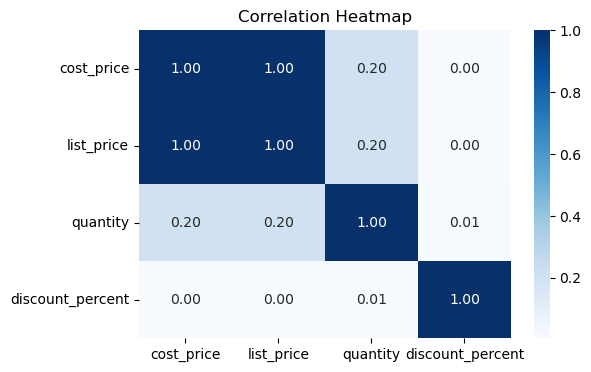

In [51]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['cost_price','list_price','quantity','discount_percent']].corr(),
            annot=True,cmap="Blues",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [55]:
df['revenue']=df['list_price']*df['quantity']
df['discount_amount']=(df['list_price']*df['discount_percent']/100)*df['quantity']
df['selling_price']=df['revenue']-df['discount_amount']
df['profit']=(df['list_price']-df['cost_price'])*df['quantity']-df['discount_amount']
df[['cost_price','list_price','quantity','discount_percent',
    'revenue','discount_amount','selling_price','profit']].head()

,cost_price,list_price,quantity,discount_percent,revenue,discount_amount,selling_price,profit
0,240,260,2,2,520,10.4,509.6,29.6
1,600,730,3,3,2190,65.7,2124.3,324.3
2,10,10,2,5,20,1.0,19.0,-1.0
3,780,960,5,2,4800,96.0,4704.0,804.0
4,20,20,2,5,40,2.0,38.0,-2.0


In [61]:
summary={
    'Total Revenue':df['revenue'].sum(),
    'Total Discount Given': df['discount_amount'].sum(),
    'Total Selling Price':df['selling_price'].sum(),
    'Total Profit':df['profit'].sum(),
    'Average Discount %':df['discount_percent'].mean(),
    'Average Profit per Order':df['profit'].mean(),
    'Average Revenue per Order':df['revenue'].mean()
}
import pandas as pd 
summary_df=pd.DataFrame(summary,index=[0])
summary_df

,Total Revenue,Total Discount Given,Total Selling Price,Total Profit,Average Discount %,Average Profit per Order,Average Revenue per Order
0,11485170,405841.8,11079328.2,1039928.2,3.48409,104.055253,1149.206524


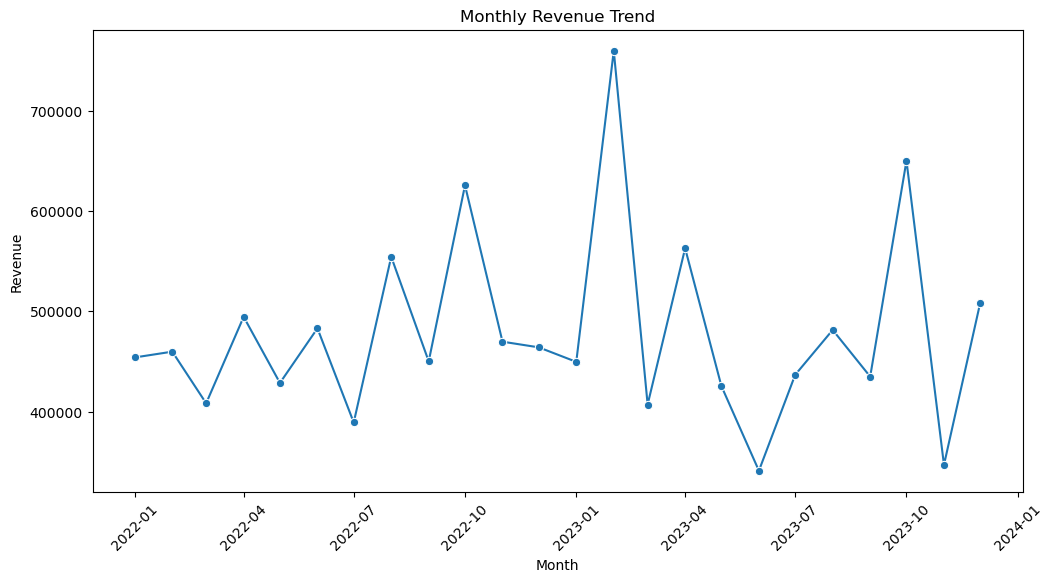

In [81]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True,errors='coerce')
monthly_revenue=df.groupby(df['order_date'].dt.to_period('M'))['revenue'].sum().reset_index()
monthly_revenue['order_date']=monthly_revenue['order_date'].dt.to_timestamp()
plt.figure(figsize=(12,6))
sns.lineplot(x='order_date',y='revenue',data=monthly_revenue,marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

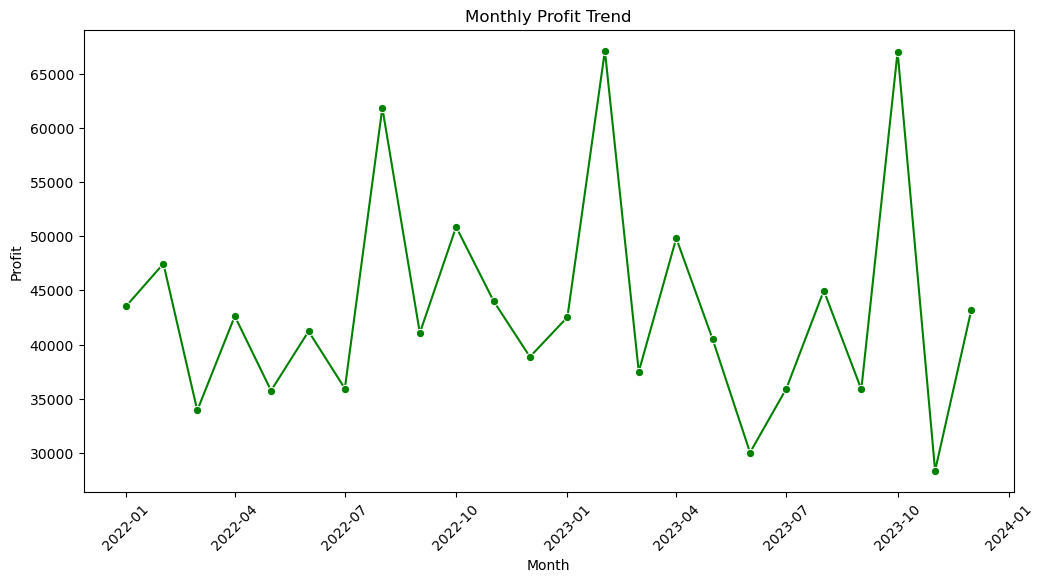

In [85]:
monthly_profit=df.groupby(df['order_date'].dt.to_period('M'))['profit'].sum().reset_index()
monthly_profit['order_date']=monthly_profit['order_date'].dt.to_timestamp()
plt.figure(figsize=(12,6))
sns.lineplot(x='order_date',y='profit',data=monthly_profit,marker='o',color='green')
plt.title("Monthly Profit Trend")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()

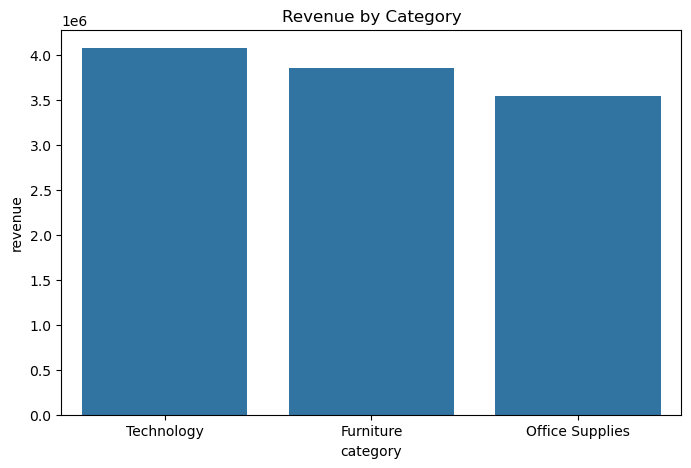

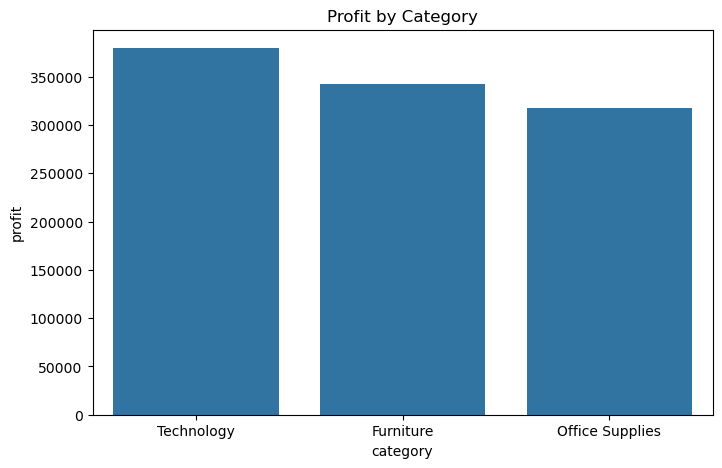

,category,revenue,profit
2,Technology,4080330,379720.7
0,Furniture,3857390,342782.4
1,Office Supplies,3547450,317425.1


In [91]:
category_perf=df.groupby('category')[['revenue','profit']].sum().reset_index().sort_values('revenue',ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x='category',y='revenue',data=category_perf)
plt.title("Revenue by Category")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='category',y='profit',data=category_perf)
plt.title("Profit by Category")
plt.show()
category_perf

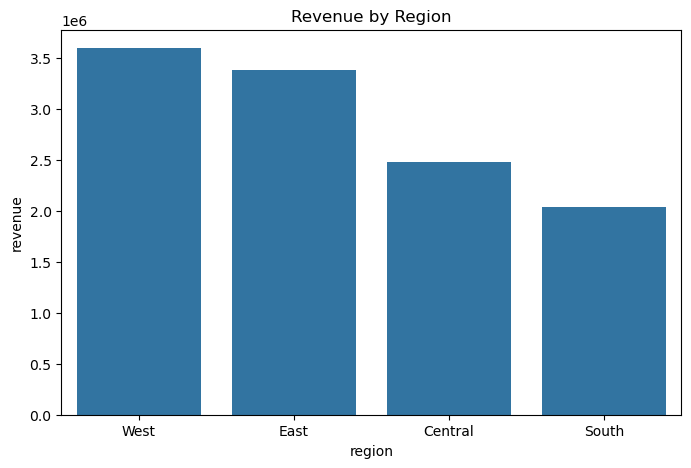

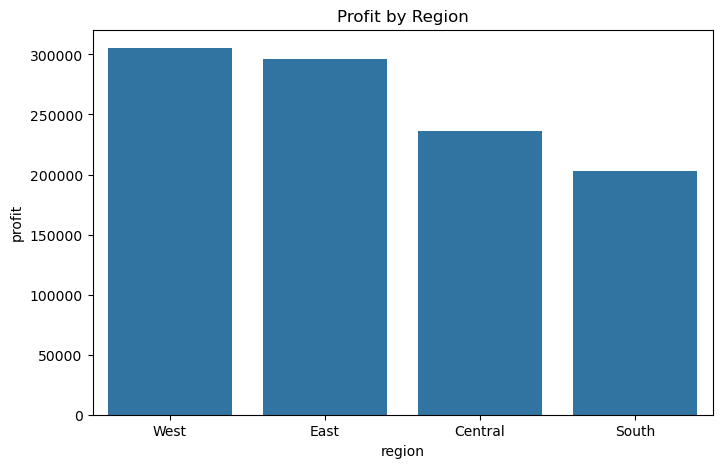

,region,revenue,profit
3,West,3594450,305289.6
1,East,3378470,295773.8
0,Central,2475030,236121.2
2,South,2037220,202743.6


In [97]:
region_pref=df.groupby('region')[['revenue','profit']].sum().reset_index().sort_values('revenue',ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x='region',y='revenue',data=region_pref)
plt.title("Revenue by Region")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='region',y='profit',data=region_pref)
plt.title("Profit by Region")
plt.show()

region_pref

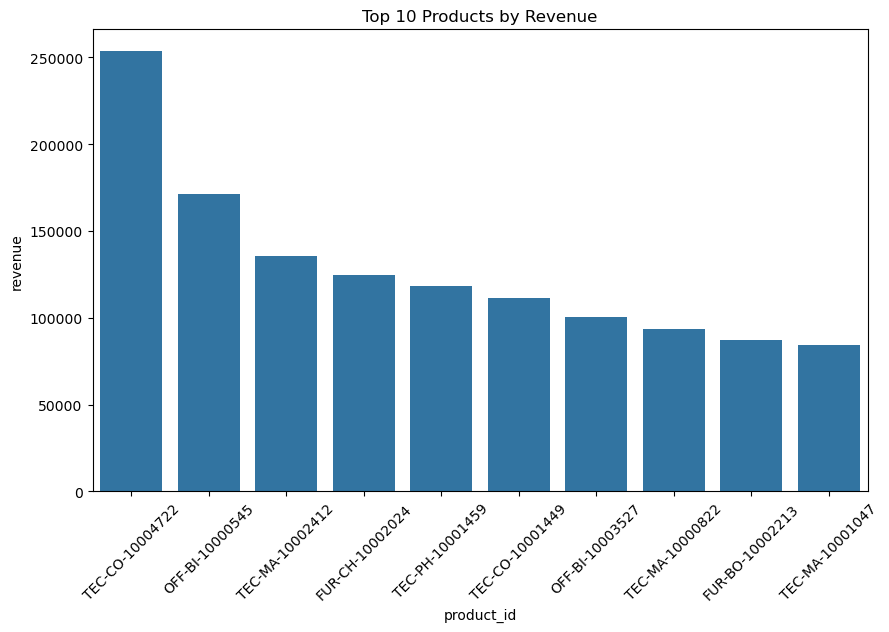

,product_id,revenue,profit
1614,TEC-CO-10004722,253400,24816.0
657,OFF-BI-10000545,171510,17867.7
1642,TEC-MA-10002412,135840,21746.4
80,FUR-CH-10002024,124470,13930.7
1724,TEC-PH-10001459,118090,11481.9
1604,TEC-CO-10001449,111480,15948.0
776,OFF-BI-10003527,100620,12792.9
1624,TEC-MA-10000822,93330,10102.3
18,FUR-BO-10002213,87270,5924.8
1630,TEC-MA-10001047,84500,9989.0


In [101]:
top_products=df.groupby('product_id')[['revenue','profit']].sum().reset_index().sort_values('revenue',ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='product_id',y='revenue',data=top_products)
plt.title("Top 10 Products by Revenue")
plt.xticks(rotation=45)
plt.show()

top_products

In [103]:
df.to_csv("retail_cleaned.csv",index=False)